# Intro to Networks
The study of networks investigates the relationship between discrete objects using [graphs](https://en.wikipedia.org/wiki/Graph_(discrete_mathematics))

![network_diagram](https://upload.wikimedia.org/wikipedia/commons/2/2f/Small_Network.png)

Graphs are a mathematical structure which represent a set of objects (called nodes or vertices) as well as their symmetric or asymmetric relationships (called links or edges).

They can be used to represent both physical systems (roads, pipelines, electrical grid) and abstract systems (social, collaboration, genetics).

For this course, we'll be using the python `networkx` package, which provides many useful classes and functions for representing and doing computations with networks. 

In addition, we'll be using the `osmnx` package, which will download openstreetmap road networks as `networkx` objects. There are a ton of useful examples in the [examples repo](https://github.com/gboeing/osmnx-examples).

This lecture is based off of the [osmnx-examples](https://github.com/gboeing/osmnx-examples) code and the [Automating GIS Processes](https://automating-gis-processes.github.io/2018/notebooks/L6/retrieve_osm_data.html) course.

In [2]:
import networkx as nx # need networkx >= 2.5
import osmnx as ox
import contextily as ctx 
from matplotlib import pyplot as plt
from shapely.geometry import Polygon
import folium
import numpy as np

In [3]:
# Specify the name that is used to seach for the data
place_name = "Cambridge, MA, USA"

# Fetch OSM street network from the location
# this will take a while because there's a lot of streets
graph = ox.graph_from_place(place_name)

In [4]:
# metadata about the graph object
graph.graph

{'created_date': '2023-07-20 06:12:37',
 'created_with': 'OSMnx 1.5.1',
 'crs': 'epsg:4326',
 'simplified': True}

In [5]:
# we can save the graph to a file so that we don't have to
# wait for it to download again next time
ox.io.save_graphml(graph, 'cambridge_osmnx.graphml')

In [6]:
# loading graph from a file
graph = ox.io.load_graphml('cambridge_osmnx.graphml')

In [ ]:
# Let's take a look at the graph
fig, ax = ox.plot_graph(graph)

In [8]:
# we can project the graph into epsg:3857 so that units are in meters
# using the .project_graph() function; 
# by default, osmnx graphs are created in WGS84, (epsg:4326)
graph_proj = ox.project_graph(graph, to_crs='epsg:3857')

In [9]:
# we can then convert the projected graph to a geodataframe
graph_nodes_gdf, graph_edges_gdf = ox.graph_to_gdfs(graph_proj)
graph_nodes_gdf.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
graph_nodes_gdf

,y,x,street_count,lon,lat,highway,geometry
osmid,,,,,,,
61175693,5.220801e+06,-7.917964e+06,3,-71.128276,42.398103,NaN,POINT (-7917963.521 5220801.149)
3895955644,5.220746e+06,-7.918006e+06,3,-71.128660,42.397735,NaN,POINT (-7918006.179 5220745.661)
61182955,5.218854e+06,-7.916612e+06,4,-71.116133,42.385184,traffic_signals,POINT (-7916611.679 5218853.870)
7893597583,5.218853e+06,-7.916601e+06,4,-71.116033,42.385178,crossing,POINT (-7916600.536 5218853.056)
7893597542,5.218865e+06,-7.916612e+06,4,-71.116138,42.385255,crossing,POINT (-7916612.247 5218864.676)
...,...,...,...,...,...,...,...
11023936975,5.217811e+06,-7.920582e+06,1,-71.151802,42.378264,NaN,POINT (-7920582.368 5217811.039)
11038367331,5.217001e+06,-7.916521e+06,1,-71.115314,42.372887,NaN,POINT (-7916520.598 5217000.836)
11042486755,5.217672e+06,-7.916176e+06,1,-71.112218,42.377342,NaN,POINT (-7916175.941 5217672.190)


In [11]:
graph_edges_gdf

osmid lanes                 name  \
u           v           key                                                    
61175693    3895955644  0    [8615932, 386272429]     2       Elmwood Street   
3895955644  8515679674  0               297244215   NaN  Alewife Linear Park   
            1092759643  0               297244215   NaN  Alewife Linear Park   
            61175693    0    [8615932, 386272429]     2       Elmwood Street   
61182955    7893597583  0                 8615747     1        Forest Street   
...                                           ...   ...                  ...   
11023936975 11023936977 0              1187041656   NaN                  NaN   
11038367331 11038367330 0              1188763605   NaN                  NaN   
11042486755 11042486757 0              1189178508   NaN                  NaN   
11044377648 11044377649 0              1189426509   NaN                  NaN   
11044377650 11044377653 0              1189426510   NaN                  NaN   

                                     highway width  oneway reversed  length  \
u           v           key                                                   
61175693    3895955644  0    [service, path]  12.2   False     True  51.634   
3895955644  8515679674  0           cycleway   NaN   False     True  62.071   
            1092759643  0           cycleway   NaN   False    False  52.446   
            61175693    0    [service, path]  12.2   False    False  51.634   
61182955    7893597583  0        residential  12.2    True    False   8.243   
...                                      ...   ...     ...      ...     ...   
11023936975 11023936977 0            service   NaN   False    False  25.136   
11038367331 11038367330 0            footway   NaN   False     True   8.992   
11042486755 11042486757 0            service   NaN   False    False  25.395   
11044377648 11044377649 0            footway   NaN   False    False   2.138   
11044377650 11044377653 0            footway   NaN   False    False   6.659   

                                                                      geometry  \
u           v           key                                                      
61175693    3895955644  0    LINESTRING (-7917963.521 5220801.149, -7917972...   
3895955644  8515679674  0    LINESTRING (-7918006.179 5220745.661, -7917922...   
            1092759643  0    LINESTRING (-7918006.179 5220745.661, -7918045...   
            61175693    0    LINESTRING (-7918006.179 5220745.661, -7918002...   
61182955    7893597583  0    LINESTRING (-7916611.679 5218853.870, -7916600...   
...                                                                        ...   
11023936975 11023936977 0    LINESTRING (-7920582.368 5217811.039, -7920615...   
11038367331 11038367330 0    LINESTRING (-7916520.598 5217000.836, -7916517...   
11042486755 11042486757 0    LINESTRING (-7916175.941 5217672.190, -7916167...   
11044377648 11044377649 0    LINESTRING (-7916917.418 5219321.643, -7916920...   
11044377650 11044377653 0    LINESTRING (-7916931.589 5219336.353, -7916929...   

                            maxspeed        service  ref access bridge  \
u           v           key                                              
61175693    3895955644  0        NaN            NaN  NaN    NaN    NaN   
3895955644  8515679674  0        NaN            NaN  NaN    NaN    NaN   
            1092759643  0        NaN            NaN  NaN    NaN    NaN   
            61175693    0        NaN            NaN  NaN    NaN    NaN   
61182955    7893597583  0     20 mph            NaN  NaN    NaN    NaN   
...                              ...            ...  ...    ...    ...   
11023936975 11023936977 0        NaN  parking_aisle  NaN    NaN    NaN   
11038367331 11038367330 0        NaN            NaN  NaN    NaN    NaN   
11042486755 11042486757 0        NaN       driveway  NaN    NaN    NaN   
11044377648 11044377649 0        NaN            NaN  NaN    NaN    NaN   
11044377650 11044377

In [ ]:
# we can also get a gdf for the footprint of the place
place_footprint = ox.geocode_to_gdf(place_name)
graph_area = place_footprint.to_crs('epsg:3857')
graph_area

In [ ]:
graph_area.plot()

## Exercises
What is the total area of cambridge in sq meters?

In [14]:
total_area = graph_area.area

print("Total area of Cambridge:", total_area, "square meters")

Total area of Cambridge: 0    3.373304e+07
dtype: float64 square meters


How many street segments in Cambridge are longer than 100 meters?

In [15]:
(graph_edges_gdf['length'] > 100).sum()

3443

## Road network statistics

In [16]:
# we can get basic stats about the network:
ox.stats.basic_stats(graph_proj)

{'n': 15580,
 'm': 46614,
 'k_avg': 5.98382541720154,
 'edge_length_total': 1602887.1479999868,
 'edge_length_avg': 34.38638923928405,
 'streets_per_node_avg': 3.245442875481386,
 'streets_per_node_counts': {0: 0,
  1: 1106,
  2: 36,
  3: 8481,
  4: 5865,
  5: 74,
  6: 14,
  7: 3,
  8: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.07098844672657253,
  2: 0.0023106546854942235,
  3: 0.5443517329910141,
  4: 0.3764441591784339,
  5: 0.0047496790757381255,
  6: 0.0008985879332477536,
  7: 0.0001925545571245186,
  8: 6.418485237483954e-05},
 'intersection_count': 14474,
 'street_length_total': 870290.1169999964,
 'street_segment_count': 25136,
 'street_length_avg': 34.62325417727548,
 'circuity_avg': 0.7722343902844059,
 'self_loop_proportion': 0.0016709102482495226}

Circuity is the ratio of network distance (distance traveled along roads) to euclidean distance (straight line). Higher circuity means greater inefficiency in traveling along the roads.

Check the [documentation](https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.stats) for more info about each statistic

In [14]:
# if you pass in the area, you can get density info
area_cambridge_sqm = graph_area['geometry'].area
ox.basic_stats(graph_proj, area=area_cambridge_sqm)

{'n': 15580,
 'm': 46614,
 'k_avg': 5.98382541720154,
 'edge_length_total': 1602887.1479999868,
 'edge_length_avg': 34.38638923928405,
 'streets_per_node_avg': 3.245442875481386,
 'streets_per_node_counts': {0: 0,
  1: 1106,
  2: 36,
  3: 8481,
  4: 5865,
  5: 74,
  6: 14,
  7: 3,
  8: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.07098844672657253,
  2: 0.0023106546854942235,
  3: 0.5443517329910141,
  4: 0.3764441591784339,
  5: 0.0047496790757381255,
  6: 0.0008985879332477536,
  7: 0.0001925545571245186,
  8: 6.418485237483954e-05},
 'intersection_count': 14474,
 'street_length_total': 870290.1169999964,
 'street_segment_count': 25136,
 'street_length_avg': 34.62325417727548,
 'circuity_avg': 0.7722343902844059,
 'self_loop_proportion': 0.0016709102482495226,
 'node_density_km': 0    461.861755
 dtype: float64,
 'intersection_density_km': 0    429.074906
 dtype: float64,
 'edge_density_km': 0    47516.833792
 dtype: float64,
 'street_density_km': 0    25799.340205
 dtype: fl

## Getting data other ways
In the above example, we used the name of a place to get the data that we wanted.

However, there are other ways to specify locations which may be more convenient.

For example, you can get [graphs from address](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=poly#osmnx.core.graph_from_address), [bounding box](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=poly#osmnx.core.graph_from_bbox), [points](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=poly#osmnx.core.graph_from_bbox), or [shapely polygon object](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=poly#osmnx.core.graph_from_polygon)

The types of networks you can get are:

-    `drive` - get drivable public streets (but not service roads)
-    `drive_service` - get drivable streets, including service roads
-    `walk` - get all streets and paths that pedestrians can use (this network type ignores one-way directionality)
-    `bike` - get all streets and paths that cyclists can use
-    `all` - download all non-private OSM streets and paths
-    `all_private` - download all OSM streets and paths, including private-access ones



In [17]:
# Coordinates of the MIT main campus in Decimal Degrees
coordinates = [(-71.092562, 42.357602), (-71.080155, 42.361553),
               (-71.089817, 42.362584), (-71.094688, 42.360198)]

# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

# convert to meters from latlong by projecting to epsg:3857
poly_m, poly_crs_m = ox.projection.project_geometry(poly, to_crs='epsg:3857')

# put a buffer of 1 mile (1609.34 m) to get everything w/in 1 mile
poly_with_buffer_m = poly_m.buffer(1609.34)

# convert back to lat-long
poly_with_buffer_ll, poly_crs_ll = ox.projection.project_geometry(poly_with_buffer_m, 
                                                        crs=poly_crs_m, 
                                                        to_crs='epsg:4326', 
                                                        to_latlong=True)

# get all walkable roads within poly
walkable_roads_near_mit = ox.graph_from_polygon(poly_with_buffer_ll, 
                                       network_type='walk',
                                       clean_periphery=True)



In [ ]:
# let's plot it
fig, ax = ox.plot_graph(walkable_roads_near_mit, figsize=(8,10), node_size=10)

In [48]:
ox.io.save_graphml(walkable_roads_near_mit, 'walkable_near_mit.graphml')

In [80]:
# example of a road
all_edges_list = list(walkable_roads_near_mit.edges) # put the id for each edge in a list
print(all_edges_list[0]) # id of first edge
print(walkable_roads_near_mit.edges[all_edges_list[0]]) # get details for first edge

(61283218, 7890342979, 0)
{'osmid': 679012558, 'name': 'Amherst Alley', 'highway': 'residential', 'maxspeed': '25 mph', 'width': '20\'0"', 'oneway': False, 'reversed': True, 'length': 7.426}


In [ ]:
# get attribute for all edges
walkable_roads_near_mit.edges(data='name')

In [81]:
# example of a node (intersection)
all_nodes_list = list(walkable_roads_near_mit.nodes)
print(all_nodes_list[0]) # id of first node
print(walkable_roads_near_mit.nodes[all_nodes_list[0]]) # details for first node

61283218
{'y': 42.3559928, 'x': -71.1033176, 'street_count': 3}


In [ ]:
# get attribute for all nodes
walkable_roads_near_mit.nodes(data='street_count')

## Exercise

How many walkable roads near MIT are longer than 100 meters?

In [21]:
# Initialize a counter for roads longer than 100 meters
num_long_roads = 0

# Iterate over the edges and count the roads longer than 100 meters
for u, v, edge_data in walkable_roads_near_mit.edges(data=True):
    if edge_data['length'] > 100:
        num_long_roads += 1

# Print the result
print("Number of walkable roads near MIT longer than 100 meters:", num_long_roads)


Number of walkable roads near MIT longer than 100 meters: 1424


In [22]:
len([edge for edge in walkable_roads_near_mit.edges(data='length') if edge[2] > 100])


1424

## Routing
We can get the node closest to a point using the `ox.distance.nearest_node` function.

{7788791691: {0: {'osmid': 815796688, 'tunnel': 'building_passage', 'oneway': False, 'highway': 'corridor', 'access': 'yes', 'width': '10', 'reversed': True, 'length': 3.733}}, 7788791690: {0: {'osmid': 834381957, 'tunnel': 'yes', 'oneway': False, 'highway': 'corridor', 'access': 'yes', 'width': '10', 'reversed': True, 'length': 2.06}}, 7619114124: {0: {'osmid': 815796688, 'tunnel': 'building_passage', 'oneway': False, 'highway': 'corridor', 'access': 'yes', 'width': '10', 'reversed': False, 'length': 15.885, 'geometry': <LINESTRING (-71.088 42.348, -71.088 42.348, -71.088 42.348, -71.088 42.348)>}}}


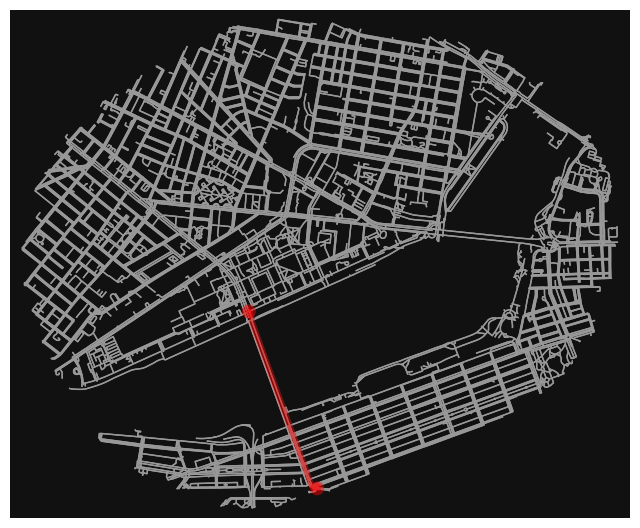

length of shortest walkable path from node 5737576908 to 7846627554 is 1176.67m


In [58]:
orig_node = ox.distance.nearest_nodes(walkable_roads_near_mit, -71.092562, 42.357602)

# let's calculate the route to a random destination node
rand_node = np.random.choice(walkable_roads_near_mit.nodes)
print(walkable_roads_near_mit[rand_node])
route = ox.distance.shortest_path(walkable_roads_near_mit, 
                         orig_node, rand_node, 
                         weight='length')
fig, ax = ox.plot_graph_route(walkable_roads_near_mit, route, node_size=0)
shortest_path_length = nx.shortest_path_length(walkable_roads_near_mit, orig_node, 
                              rand_node, weight='length')
print(f'length of shortest walkable path from node {orig_node} to {rand_node} is {shortest_path_length:.2f}m') # the {:.2f} syntax means round off to 2 digits after decimal pt

The `shortest_path` function in networkx uses [Dijkstra's algorithm](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm) to efficiently calculate the shortest path between two nodes. The networkx library also provides many other useful functions on graphs; for instance, the [Floyd-Warshall algorithm](https://en.wikipedia.org/wiki/Floyd%E2%80%93Warshall_algorithm), which efficiently computes the shortest paths between all pairs of nodes, and the [A* (A-star) algorithm](https://en.wikipedia.org/wiki/A*_search_algorithm), which is similar to Dijkstra's algorithm, except it runs faster by taking advantage of a distance "approximation" that can be calculated between two nodes without knowing the shortest path outright. Check out these links if you want to learn more about these algorithms, and check out the [networkx documentation](https://networkx.github.io/documentation/networkx-2.4/index.html) if you want to learn more about all the methods networkx provides.

## Building outlines
We can get the footprint of objects such as buildings as geodataframes with `osmnx`. Here we'll get the building footprints near MIT.

In [24]:
# we can get the footprints of objects within this poly
building_footprints = ox.geometries.geometries_from_polygon(poly_with_buffer_ll, tags={'building':True})


/tmp/ipykernel_81/1688235439.py:2: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  building_footprints = ox.geometries.geometries_from_polygon(poly_with_buffer_ll, tags={'building':True})


You can perform any query using OSM tags: https://wiki.openstreetmap.org/wiki/Map_features

Note that if you include multiple tags, it gets the **union** of the results, not the intersection

In [25]:
road_footprints = ox.geometries.geometries_from_polygon(poly_with_buffer_ll, tags={'highway':True}) # get roads with geometry
# note that most roads do not have footprint information

/tmp/ipykernel_81/3554726378.py:1: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  road_footprints = ox.geometries.geometries_from_polygon(poly_with_buffer_ll, tags={'highway':True}) # get roads with geometry


In [26]:
# project into UTM for info in meters
building_footprints_proj = ox.projection.project_gdf(building_footprints)
road_footprints_proj = ox.projection.project_gdf(road_footprints)
building_footprints_proj

description level operator railway wheelchair  \
element_type osmid                                                     
node         367777174         NaN   NaN      NaN     NaN        NaN   
             367777182         NaN   NaN      NaN     NaN        NaN   
             367777189         NaN   NaN      NaN     NaN        NaN   
             367777193         NaN   NaN      NaN     NaN        NaN   
             367777196         NaN   NaN      NaN     NaN        NaN   
...                            ...   ...      ...     ...        ...   
relation     9712525           NaN   NaN      NaN     NaN        NaN   
             11216258          NaN   NaN     MBTA     NaN        yes   
             11293728          NaN   NaN      NaN     NaN        NaN   
             13334236          NaN   NaN      NaN     NaN        NaN   
             15990700          NaN   NaN      NaN     NaN        NaN   

                                                                 geometry  \
element_type osmid                                                          
node         367777174                     POINT (328824.089 4692931.501)   
             367777182                     POINT (327563.105 4691913.104)   
             367777189                     POINT (327731.461 4691862.103)   
             367777193                     POINT (326878.992 4690851.306)   
             367777196                     POINT (327725.526 4692004.648)   
...                                                                   ...   
relation     9712525    POLYGON ((327578.726 4690725.452, 327583.391 4...   
             11216258   MULTIPOLYGON (((329374.544 4691973.555, 329420...   
             11293728   POLYGON ((327600.135 4690609.826, 327612.595 4...   
             13334236   POLYGON ((326593.626 4691929.032, 326608.671 4...   
             15990700   POLYGON ((326707.553 4692445.688, 326727.639 4...   

                       height access door lockable  ... design:ref  \
element_type osmid                                  ...              
node         367777174    NaN    NaN  NaN      NaN  ...        NaN   
             367777182    NaN    NaN  NaN      NaN  ...        NaN   
             367777189    NaN    NaN  NaN      NaN  ...        NaN   
             367777193    NaN    NaN  NaN      NaN  ...        NaN   
             367777196    NaN    NaN  NaN      NaN  ...        NaN   
...                       ...    ...  ...      ...  ...        ...   
relation     9712525      NaN    NaN  NaN      NaN  ...        NaN   
             11216258     NaN    NaN  NaN      NaN  ...        NaN   
             11293728     NaN    NaN  NaN      NaN  ...        NaN   
             13334236     NaN    NaN  NaN      NaN  ...        NaN   
             15990700     NaN    NaN  NaN      NaN  ...        NaN   

                       emergency_telephone_code seats wall building:entrances  \
element_type osmid                                                              
node         367777174                      NaN   NaN  NaN                NaN   
             367777182                      NaN   NaN  NaN                NaN   
             367777189                      NaN   NaN  NaN                NaN   
             367777193                      NaN   NaN  NaN                NaN   
             367777196                      NaN   NaN  NaN                NaN   
...                                         ...   ...  ...                ...   
relation     9712525                        NaN   NaN  NaN                NaN   
             11216258                       NaN   NaN  NaN                NaN   
             11293728                       NaN   NaN  NaN                NaN   
             13334236                       NaN   NaN  NaN                NaN   
             15990700                       NaN   NaN  NaN                NaN   

                       garage bicycle_parking abbr_name  \
element_type osmid                                        
n

In [27]:
# column names
building_footprints_proj.columns.values

array(['description', 'level', 'operator', 'railway', 'wheelchair',
       'geometry', 'height', 'access', 'door', 'lockable', 'man_made',
       'addr:state', 'building', 'ele', 'gnis:county_name',
       'gnis:feature_id', 'gnis:import_uuid', 'gnis:reviewed', 'name',
       'source', 'addr:city', 'addr:housenumber', 'addr:postcode',
       'addr:street', 'tourism', 'bicycle', 'amenity', 'maxheight',
       'parking', 'colour', 'note', 'image', 'covered', 'surface',
       'indoor', 'seasonal', 'material', 'motor_vehicle',
       'generator:output:electricity', 'generator:source', 'location',
       'operator:wikidata', 'operator:wikipedia', 'power', 'ref',
       'substation', 'transformer', 'voltage', 'country', 'lit',
       'supervised', 'emergency', 'capacity', 'fee', 'leisure', 'phone',
       'power_supply', 'sanitary_dump_station',
       'seamark:harbour:category', 'seamark:type', 'vhf', 'website',
       'clothes', 'email', 'opening_hours', 'shop', 'contact:facebook',
      

In [28]:
# drop rows where there's no shape info
building_footprints_proj = building_footprints_proj.dropna(subset=['geometry'])
road_footprints = road_footprints.dropna(subset=['geometry'])

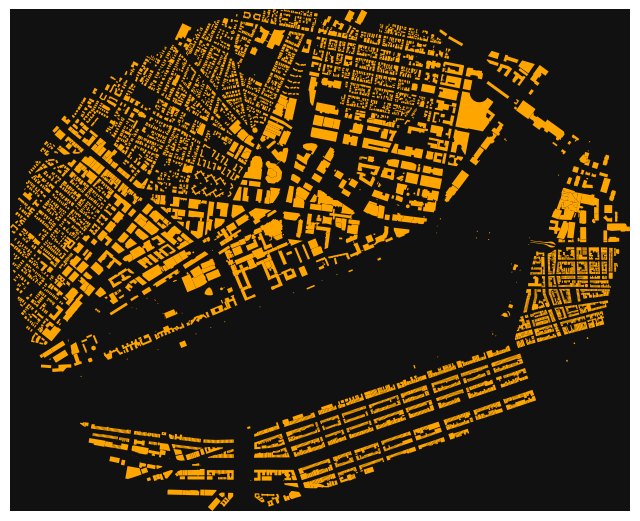

In [29]:
fig, ax = ox.plot_footprints(building_footprints_proj)

In [ ]:
# plot roads with footprints
fig, ax = ox.plot_footprints(road_footprints_proj) # note that this is only a small subset of all roads

In [31]:
# save the geodataframe to a file to persist
# can choose to write only a subset of columns if you want
building_footprints_proj[['description', 'operator', 'railway', 'geometry', 'attribution',
       'source', 'addr:city', 'addr:housenumber', 'addr:postcode',
       'addr:state', 'addr:street', 'amenity']].to_file('buildings_around_mit.geojson', driver='GeoJSON')


## Exercises
Plot the walkable roads and buildings in the area near MIT in the same figure. The `osmnx` plotting features use matplotlib on the backend. Check [the documentation](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.plot.plot_graph) for more formatting options for plotting

<Axes: >

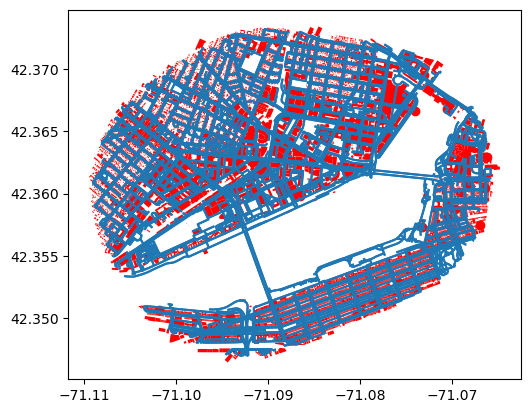

In [32]:
walkable_roads_nodes, walkable_roads_edges = ox.graph_to_gdfs(walkable_roads_near_mit)
ax = walkable_roads_edges.plot()
building_footprints_proj.to_crs(walkable_roads_edges.crs).plot(ax = ax, color='r')

Now, go back to one of the previous exercises and plot all the nodes on the periphery of Cambridge and the roads in Cambridge in the same figure.

In [57]:
walkable_roads_edges, walkable_roads_nodes.explore()

(                                               osmid                  name  \
 u           v           key                                                  
 61283218    7890342979  0                  679012558         Amherst Alley   
             7890342967  0                  758187788         Vassar Street   
             5492841607  0                  758187788         Vassar Street   
 61283269    7866981406  0                    8615816  Massachusetts Avenue   
             5737576890  0                  426604930         Vassar Street   
 ...                                              ...                   ...   
 11028209672 6542726506  1    [696702125, 1187660030]                   NaN   
             11028209663 0                 1187660030                   NaN   
 11028209675 11028209672 0                    8650225                   NaN   
             61450302    0                  240745676         Beacon Street   
             4260960996  0     [426830724, 240745676

In [ ]:
walkable_roads_nodes.explore

## Interactive graph with folium
Folium is a library which creates interactive web maps. This can be used to visualize and explore the data. However, it is slower to load and cannot scale to as large networks as the standard matplotlib plotting

In [ ]:
folium_graph = ox.plot_graph_folium(walkable_roads_near_mit)
folium_graph

In [ ]:
ox.plot_route_folium(walkable_roads_near_mit, route, route_map = folium_graph, color='#ff0000')

## Get places of interest
OSM can also give places of interest, like restaurants, pharmacies, hospitals, and toilets. The full list is available [here](https://wiki.openstreetmap.org/wiki/Key:amenity).

Let's look at the POIs near MIT.

In [33]:
fast_food = ox.geometries.geometries_from_polygon(poly_with_buffer_ll, tags={'amenity': 'fast_food'})
fast_food

/tmp/ipykernel_81/2748183165.py:1: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  fast_food = ox.geometries.geometries_from_polygon(poly_with_buffer_ll, tags={'amenity': 'fast_food'})


addr:housenumber addr:postcode           addr:street  \
element_type osmid                                                              
node         566889950                263         02139      Brookline Street   
             566890089                272         02139      Brookline Street   
             1735987384               280           NaN      Cambridge Street   
             2134089521               598           NaN  Massachusetts Avenue   
             2350393263               530         02215   Commonwealth Avenue   
             2367929358               540         02215   Commonwealth Avenue   
             2428711851               NaN           NaN                   NaN   
             2428711853               NaN           NaN                   NaN   
             2430573649               NaN           NaN                   NaN   
             2446018087               NaN           NaN                   NaN   
             2501165514               NaN           NaN                   NaN   
             2560514681               245           NaN  Massachusetts Avenue   
             2686928559               NaN           NaN                   NaN   
             2700809502               242         02114      Cambridge Street   
             2707976346               736         02139  Massachusetts Avenue   
             2707976349               744           NaN  Massachusetts Avenue   
             2708166079               277         02114      Cambridge Street   
             4195245318               NaN           NaN                   NaN   
             4354050789                42           NaN        Charles Street   
             4360543289               NaN           NaN                   NaN   
             4406184596               300         02114      Cambridge Street   
             4406184597               296         02114      Cambridge Street   
             4406195907               161         02114        Charles Street   
             4722509102               181         02139  Massachusetts Avenue   
             5019071925               NaN           NaN                   NaN   
             5122876709               181         02139  Massachusetts Avenue   
             5627766951               292           NaN  Massachusetts Avenue   
             5633740689               NaN           NaN                   NaN   
             5633753513               NaN           NaN                   NaN   
             5811134127               225         02116        Newbury Street   
             6117409528               301           NaN          Third Street   
             7475242050               354         02115        Newbury Street   
             7501883775               234         02116        Newbury Street   
             7625672550              324a         02115        Newbury Street   
             7735023387               255         02116        Newbury Street   
             7785682404               244         02116        Newbury Street   
             7911407804               NaN           NaN                   NaN   
             7924592200                 1         02142              Broadway   
             9701394228               NaN           NaN                   NaN   
             10760274783               23           NaN       Prospect Street   
way          29938285                 463           NaN  Massachusetts Avenue   

                            amenity  check_date              cuisine  \
element_type osmid                                                     
node         566889950    fast_food  2023-05-16                pizza   
             566890089    fast_food         NaN                greek   
             1735987384   fast_food         NaN                pizza   
             2134089521   fast_food  2023-05-10              mexican   
             2350393263   fast_food         NaN    donut;coffee_shop   
             2367929358   fast_food  

In [34]:
walkable_nodes, walkable_edges = ox.graph_to_gdfs(walkable_roads_near_mit)

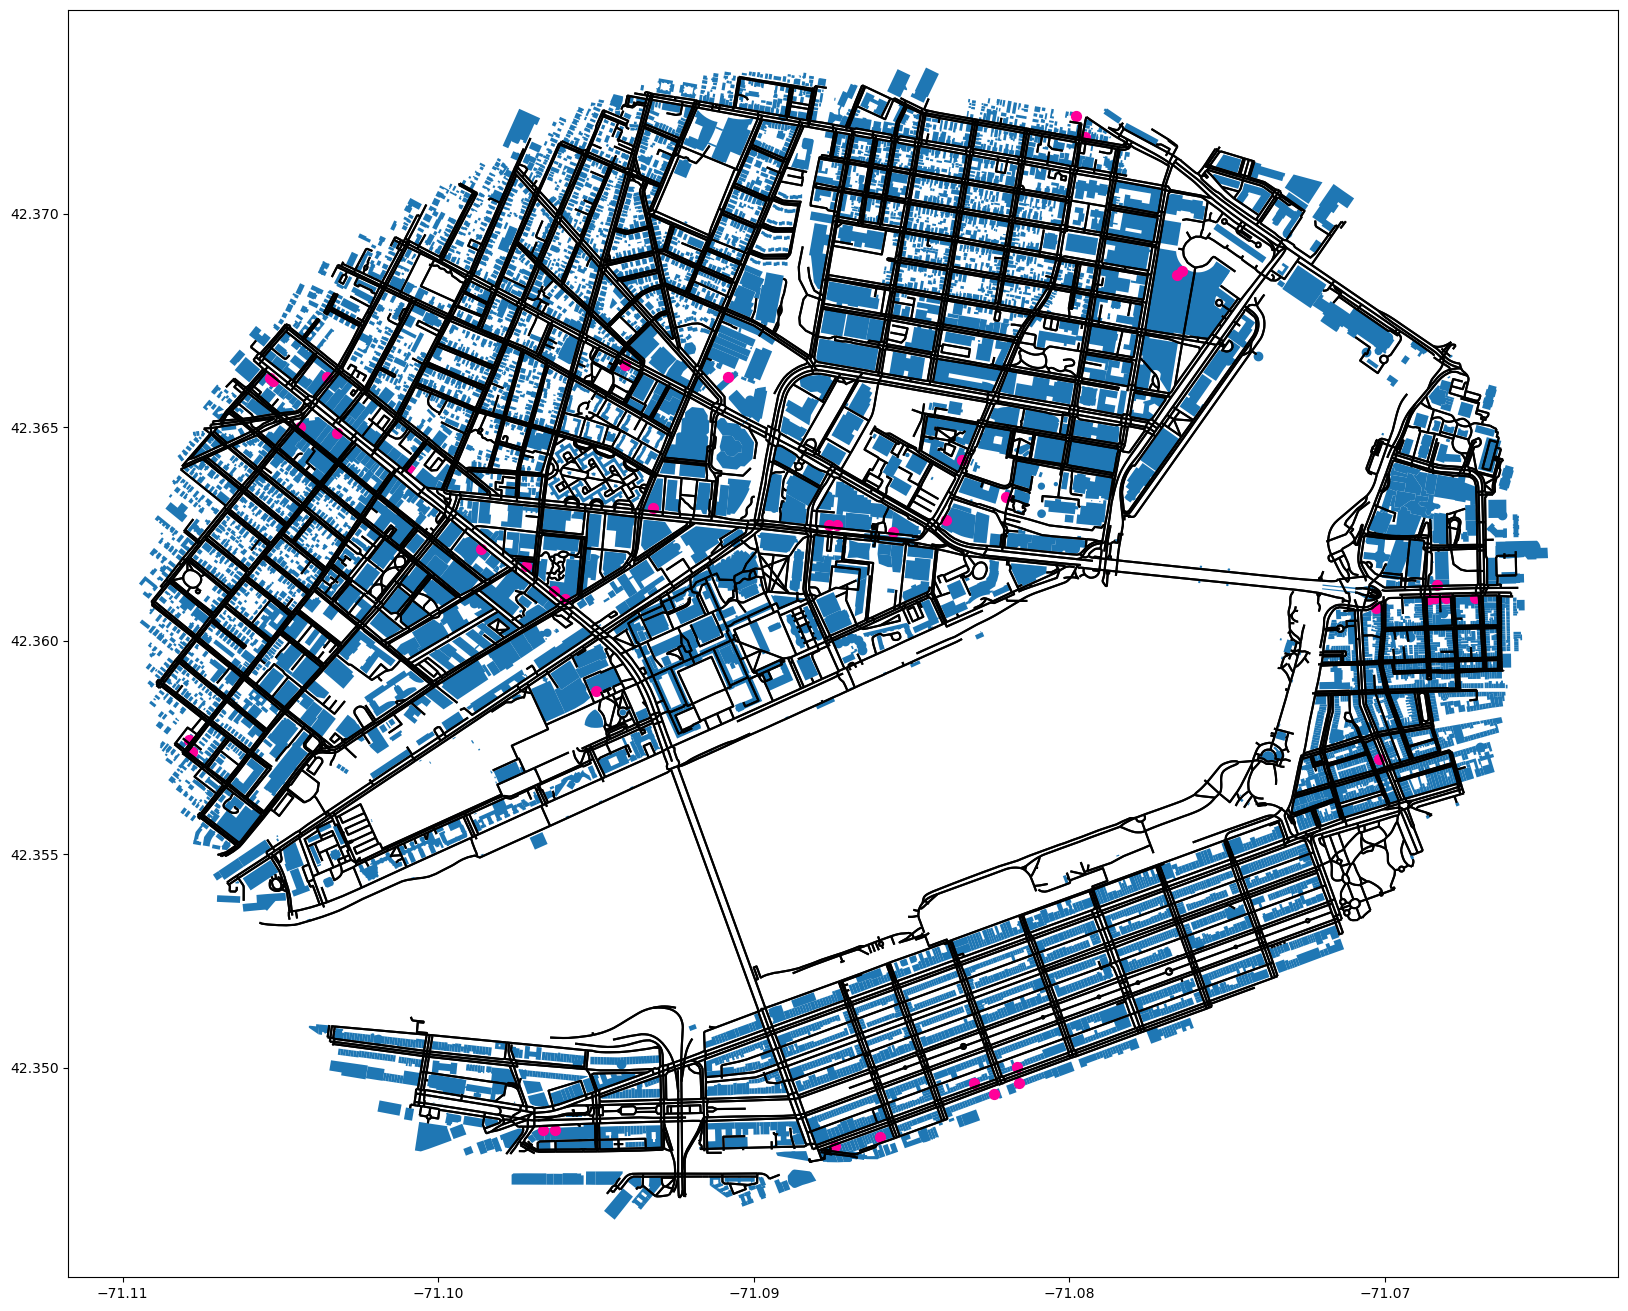

In [35]:
# plot roads, buildings, and fast_food
fig, ax = plt.subplots(1,1, figsize=[20,20])
building_footprints.plot(ax=ax)
walkable_edges.plot(ax=ax, color='black')
fast_food.plot(ax=ax, color='#FF0099', markersize=50)
plt.show()

# Exercise
In groups, pick a location, ask an interesting question, do an analysis to answer that question.


In [49]:
place_name = "Portland, MA, USA"


In [ ]:
graph = ox.graph_from_place(place_name)
ox.io.save_graphml(graph, 'portland_osmnx.graphml')
graph = ox.io.load_graphml('portland_osmnx.graphml')
fig, ax = ox.plot_graph(graph)

In [81]:
# import pandas as pd
# pd.set_option('display.max_colwidth', None)
# place_footprint = ox.geocode_to_gdf(place_name)
# graph_area1 = place_footprint.to_crs('epsg:3857')
# print(graph_area['geometry'].to_string(index=False))


In [82]:
# Coordinates of the MIT main campus in Decimal Degrees


coordinates = [(-70.25, 44.07), (-69.95, 43.63), (-70.25, 43.42), (-70.55, 43.67)]


# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

# convert to meters from latlong by projecting to epsg:3857
poly_m, poly_crs_m = ox.projection.project_geometry(poly, to_crs='epsg:3857')

# put a buffer of 1 mile (1609.34 m) to get everything w/in 1 mile
poly_with_buffer_m = poly_m.buffer(1609.34)


In [83]:

# convert back to lat-long
poly_with_buffer_ll, poly_crs_ll = ox.projection.project_geometry(poly_with_buffer_m, 
                                                        crs=poly_crs_m, 
                                                        to_crs='epsg:4326', 
                                                        to_latlong=True)

# get all walkable roads within poly
walkable_roads_near_Portland = ox.graph_from_polygon(poly_with_buffer_ll, 
                                       network_type='walk',
                                       clean_periphery=True)


In [ ]:
fig, ax = ox.plot_graph(walkable_roads_near_Portland, figsize=(8,10), node_size=10)